# Optimal on the chain walk environment

## Define parameters

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import jax
import os
import json

parameters = json.load(open("parameters.json"))
n_states = parameters["n_states"]
n_actions = parameters["n_actions"]
sucess_probability = parameters["sucess_probability"]
gamma = parameters["gamma"]
env_seed = parameters["env_seed"]

# keys
env_key = jax.random.PRNGKey(env_seed)

## Define environment

In [2]:
import numpy as np
from pbo.environment.chain_walk import ChainWalkEnv


states = np.arange(n_states)
actions = np.arange(n_actions)
states_boxes = np.arange(n_states + 1) - 0.5
actions_boxes = np.arange(n_actions + 1) - 0.5

env = ChainWalkEnv(env_key, n_states, sucess_probability, gamma)

## Optimal Q and V functions

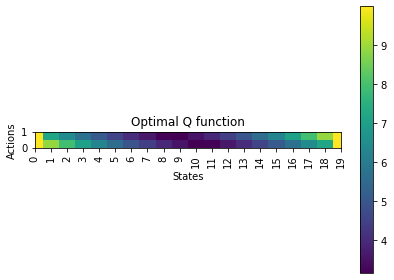

In [3]:
from pbo.utils.two_dimesions_mesh import TwoDimesionsMesh

optimal_q = env.optimal_Q_mesh()
optimal_v = optimal_q.max(axis=1)

q_visu_mesh = TwoDimesionsMesh(states, actions, 0)

q_visu_mesh.set_values(optimal_q)
q_visu_mesh.show("Optimal Q function")

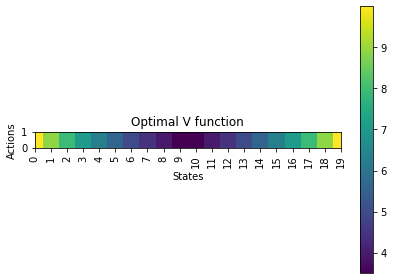

In [4]:
q_visu_mesh.set_values(np.repeat(optimal_v.reshape((-1, 1)), 2, axis=1))
q_visu_mesh.show("Optimal V function")

## Save data

In [5]:
np.save(f"figures/data/optimal/Q.npy", optimal_q)
np.save(f"figures/data/optimal/V.npy", optimal_v)